<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [21]:
import pandas as pd

Load the dataset into a dataframe.


In [22]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


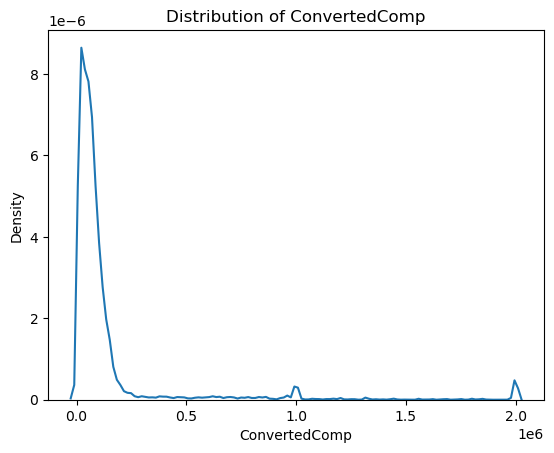

In [23]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.distplot(df['ConvertedComp'], hist=False, kde=True)
plt.title('Distribution of ConvertedComp')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


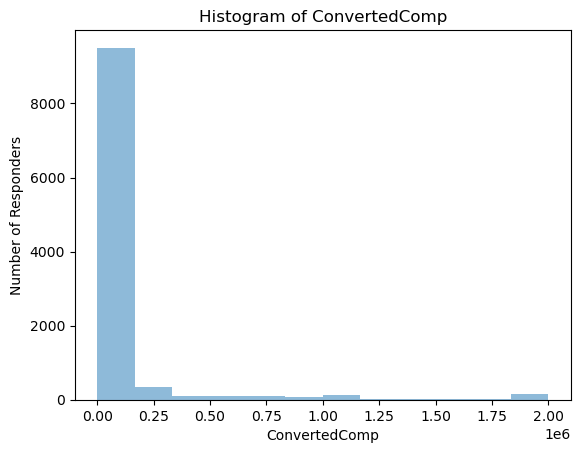

In [24]:
# your code goes here
plt.hist(df['ConvertedComp'], bins=12, alpha=0.5)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Number of Responders')
plt.show()

What is the median of the column `ConvertedComp`?


In [25]:
# your code goes here
print('The median of column ConvertedComp is', df['ConvertedComp'].median())

The median of column ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [26]:
# your code goes here
print('There are',(df['Gender']=='Man').sum(),'responders who identified themselves only as a Man.')

There are 10480 responders who identified themselves only as a Man.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [27]:
# your code goes here
print('The median ConvertedComp of responders who identified themselves only as a Woman is',df.loc[df['Gender']=='Woman','ConvertedComp'].median())

The median ConvertedComp of responders who identified themselves only as a Woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [29]:
print('The median age is',df['Age'].median())
print('The median ConvertedComp is',df['ConvertedComp'].median())

The median age is 29.0
The median ConvertedComp is 57745.0


Plot a histogram of the column `Age`.


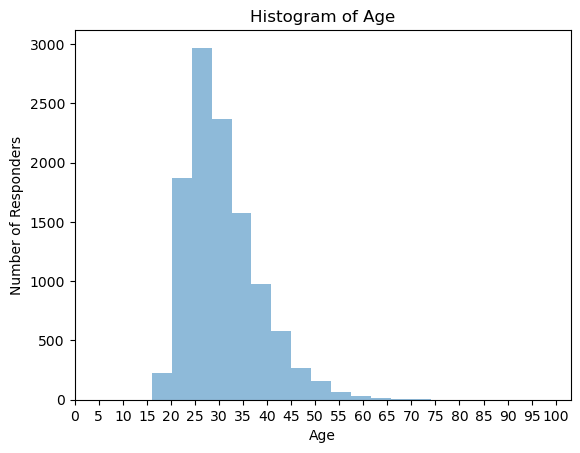

In [30]:
# your code goes here
plt.hist(df['Age'], bins=20, alpha=0.5)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Responders')
plt.xticks(range(0,int(df['Age'].max())+5,5))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


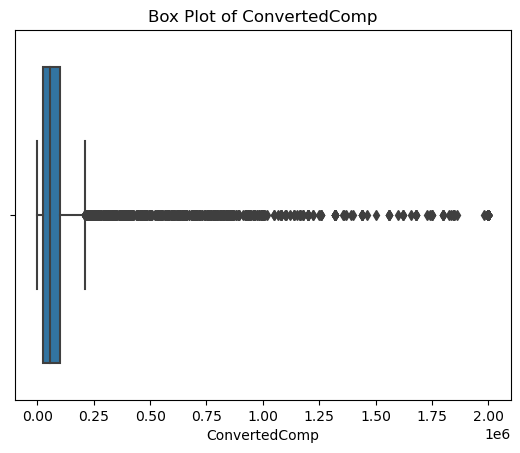

In [31]:
# your code goes here
sns.boxplot(df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [32]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
iqr=q3-q1
print('The IQR for the ConvertedComp column is',iqr)

The IQR for the ConvertedComp column is 73132.0


Find out the upper and lower bounds.


In [33]:
# your code goes here
upper_bound = df['ConvertedComp'].max()
lower_bound = df['ConvertedComp'].min()
print('The lower bound is', lower_bound, 'and the upper bound is', upper_bound)

The lower bound is 0.0 and the upper bound is 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [34]:
# your code goes here
num_outliers = ((df['ConvertedComp'] < (q1 - 1.5 * iqr)) | (df['ConvertedComp'] > (q3 + 1.5 * iqr))).sum()
print('The number of outliers in the ConvertedComp column is',num_outliers)

The number of outliers in the ConvertedComp column is 879


In [42]:
outliers_below_q1 = (df['Age'] < (q1 - 1.5 * iqr)).sum()
print('The number of outliers in the Age column below Q1 is',outliers_below_q1)

The number of outliers in the Age column below Q1 is 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [35]:
# your code goes here
df1 = df[(df['ConvertedComp'] >= (q1 - 1.5 * iqr)) & (df['ConvertedComp'] <= (q3 + 1.5 * iqr))]
num_outliers_check = ((df1['ConvertedComp'] < (q1 - 1.5 * iqr)) | (df1['ConvertedComp'] > (q3 + 1.5 * iqr))).sum()
print(num_outliers_check)

0


In [50]:
print('The median ConvertedComp after removing outliers is',df1['ConvertedComp'].median())
print(f"The mean ConvertedComp after removing outliers is{(df1['ConvertedComp'].mean()): 0.2f}")

The median ConvertedComp after removing outliers is 52704.0
The mean ConvertedComp after removing outliers is 59883.21


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [48]:
# your code goes here
df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
